In [1]:
using RegularizedSystems
using VSTom
using PyPlot

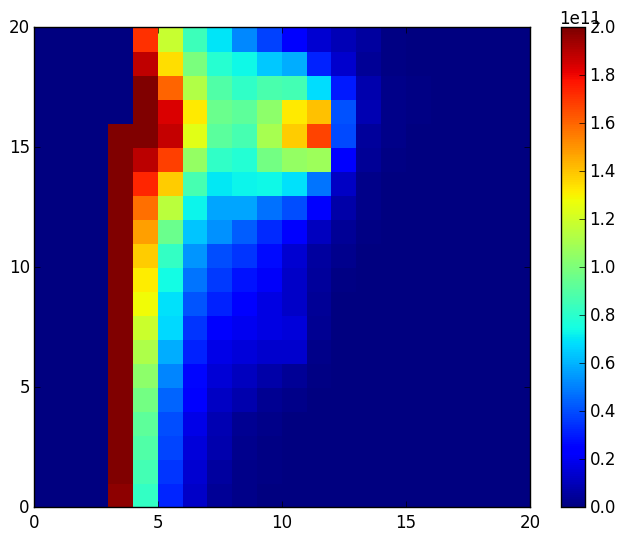

PyObject <matplotlib.colorbar.Colorbar object at 0x7facfb7875f8>

In [58]:
true_dist = read_ncdf("data/true_sawtooth_distributions.cdf")
pcolor(true_dist["True_before_coarse_cut"],vmax=2e11)
colorbar()

In [2]:
aa = read_ncdf("data/31557_stuff_for_Luke.nc")

Dict{String,Any} with 6 entries:
  "transfer_matrix" => [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0…
  "data_hat"        => [0.034402038902044296,1.156235933303833,0.24167290329933…
  "data"            => [3.6490042146816e13,1.238057072197632e15,2.5575402818764…
  "E"               => [1.0,6.210526466369629,11.421052932739258,16.63158035278…
  "noise"           => [1.0606941831168e15,1.070765076119552e15,1.0582652448931…
  "p"               => [-0.9599999785423279,-0.8589473366737366,-0.757894694805…

In [3]:
A = aa["transfer_matrix"]
b = aa["data_hat"]
energy = aa["E"]
pitch = aa["p"]
dE = abs(energy[2] - energy[1])
dp = abs(pitch[2] - pitch[1])

0.10105264186859131

In [51]:
dE*dp

0.5265374649528667

#TSVD

In [5]:
tsvd = TSVDFunctional(A,b);

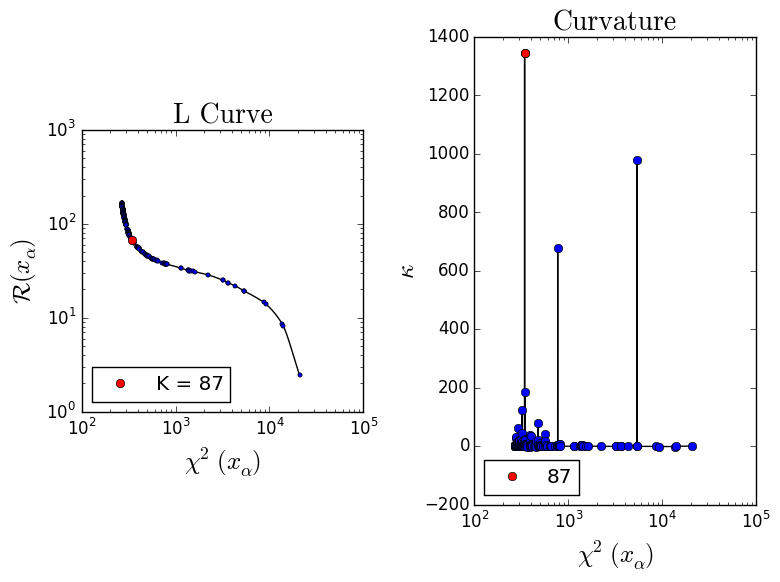

87

In [10]:
k = discrete_lcurve(tsvd,1:200,nseeds=200,doplot=true)

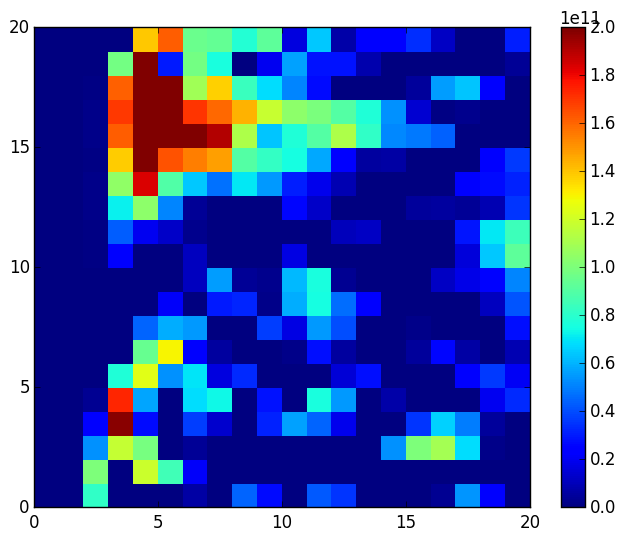

PyObject <matplotlib.colorbar.Colorbar object at 0x7fad27b8b588>

In [23]:
sol = minimize(tsvd,k);
pcolor(reshape(max(sol.x,0.0),20,20),vmax=2e11)
colorbar()

#TIK0

In [21]:
nr,nc = size(A)
tik0 = TikhonovFunctional(A,b,(eye(nc),));

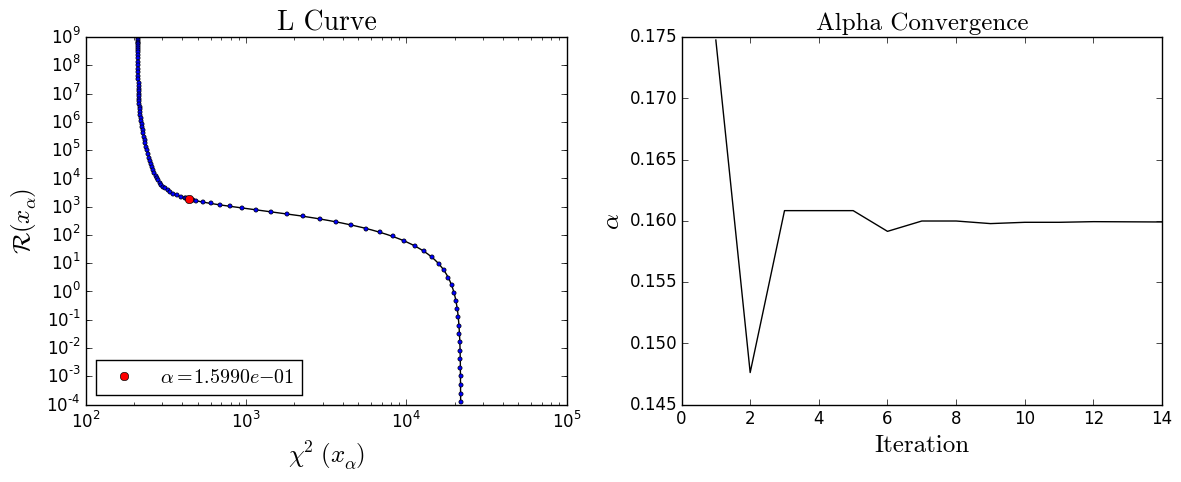

0.15990179461789555

In [53]:
tik0_alpha = lcurve(tik0;log_alpha_range=(-10,5),nseeds=100,doplot=true)

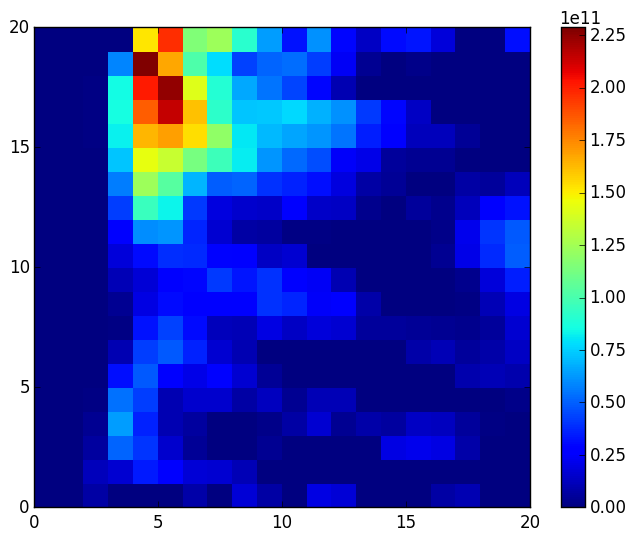

PyObject <matplotlib.colorbar.Colorbar object at 0x7facf3e41be0>

In [59]:
sol = minimize(tik0,tik0_alpha);
pcolor(reshape(max(sol.x,0.0),20,20))
colorbar()

#TIK1

In [25]:
L1E,L1p = gradEP(energy,pitch)
nr,nc = size(A)
tik1 = TikhonovFunctional(A,b,(L1E,L1p));

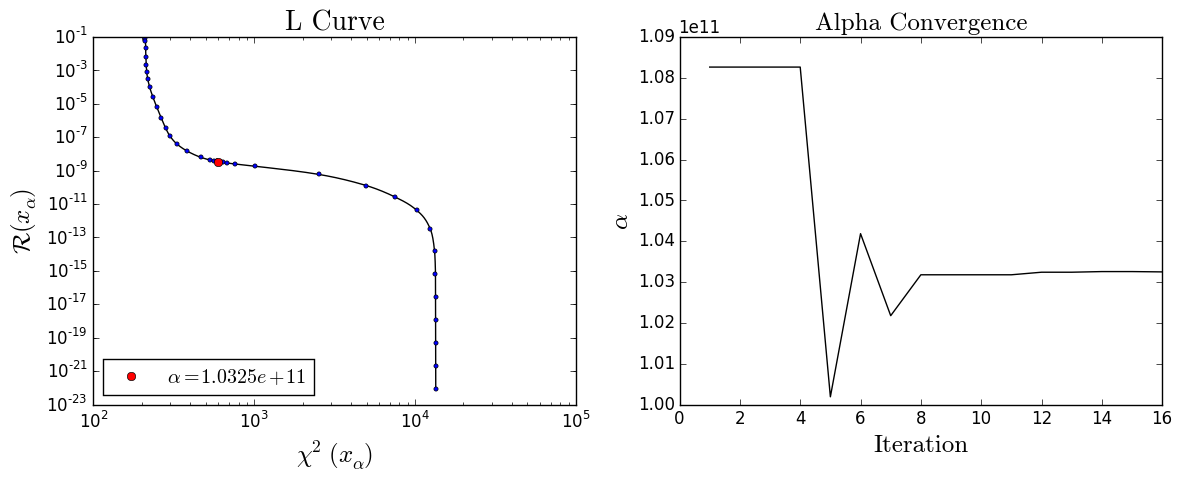

1.0324819688277246e11

In [60]:
tik1_alpha = lcurve(tik1;log_alpha_range=(0,20),nseeds=30,doplot=true)

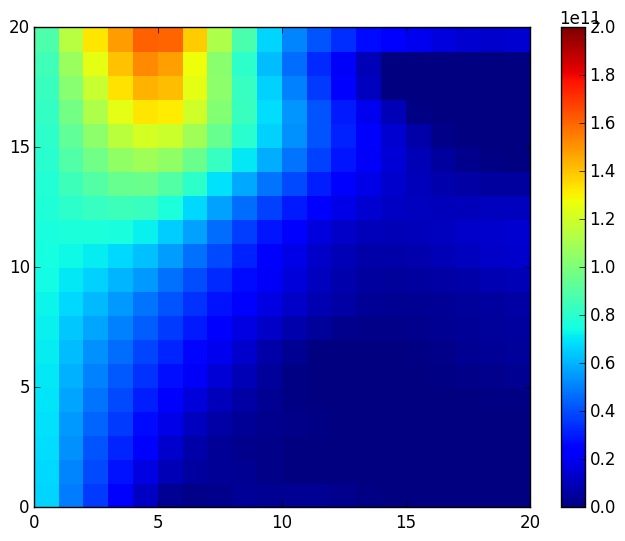

PyObject <matplotlib.colorbar.Colorbar object at 0x7facf30b0d30>

In [61]:
sol = minimize(tik1,tik1_alpha);
pcolor(reshape(max(sol.x,0.0),20,20),vmax=2e11)
colorbar()

#Minimum Fisher

In [32]:
L1E,L1p = gradEP(energy,pitch)
nr,nc = size(A)
mf = FisherFunctional(A,b,(L1E,L1p));

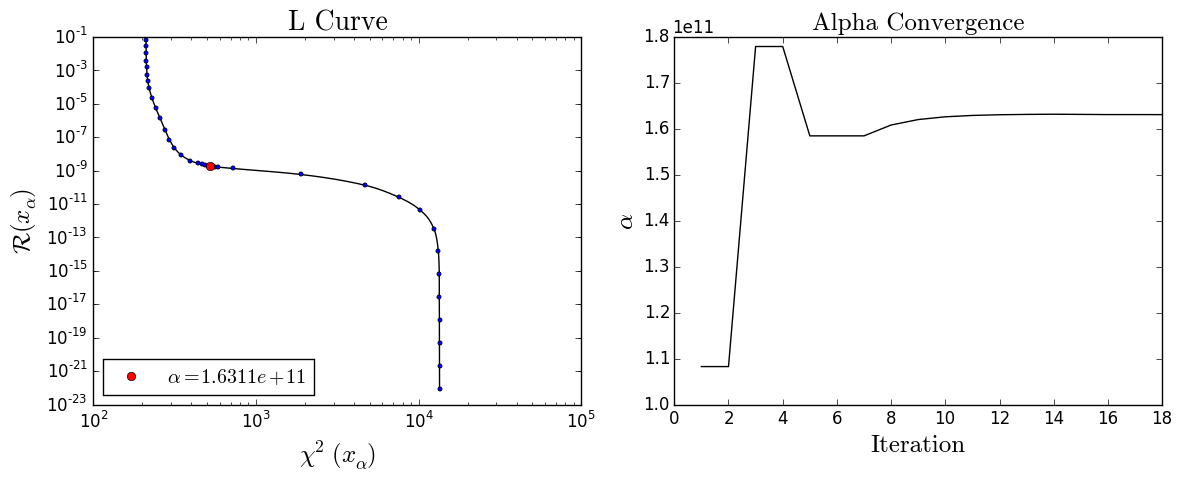

1.6310832047039893e11

In [64]:
mf_alpha = lcurve(mf;log_alpha_range=(0,20),nseeds=30,doplot=true)

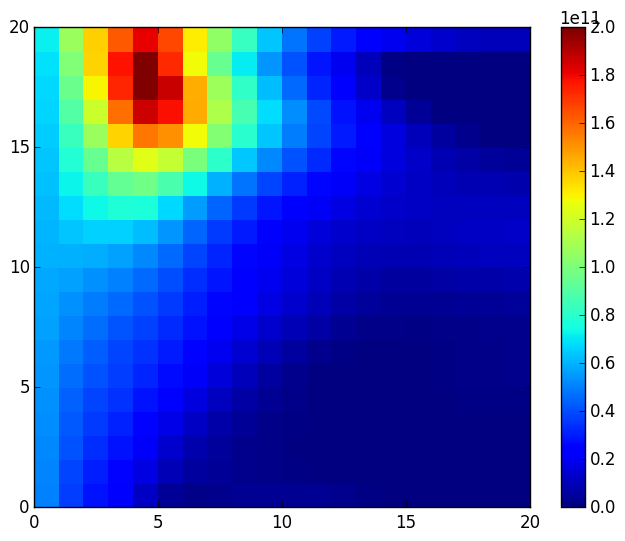

PyObject <matplotlib.colorbar.Colorbar object at 0x7facf3847358>

In [65]:
sol = minimize(mf,mf_alpha);
pcolor(reshape(max(sol.x,0.0),20,20),vmax=2e11)
colorbar()

#Maximum Entropy

In [41]:
me= EntropyFunctional(A,b;Ascale=1e4);

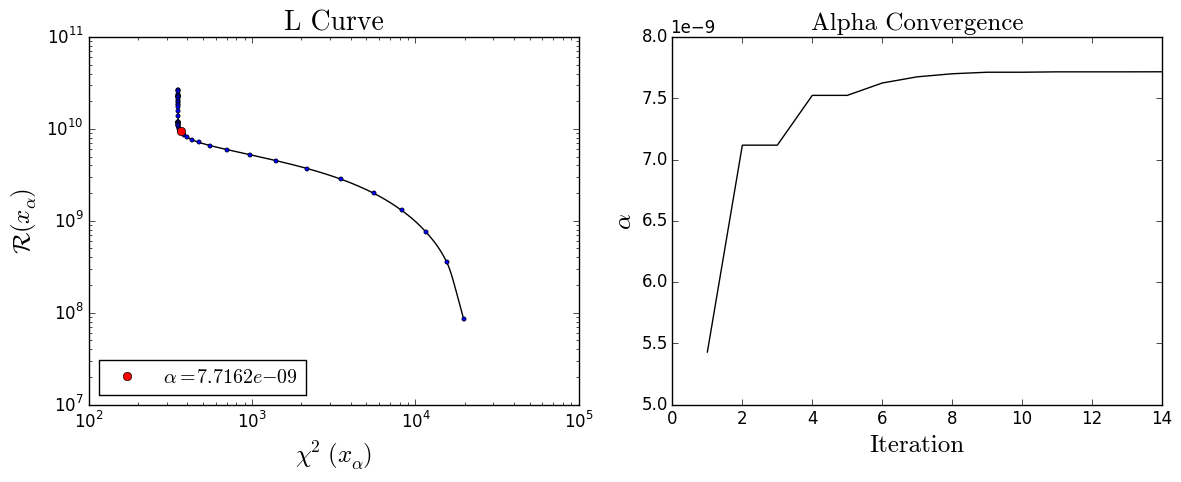

7.716194439650329e-9

In [67]:
me_alpha = lcurve(me;log_alpha_range=(-15,-5),nseeds=50,doplot=true)

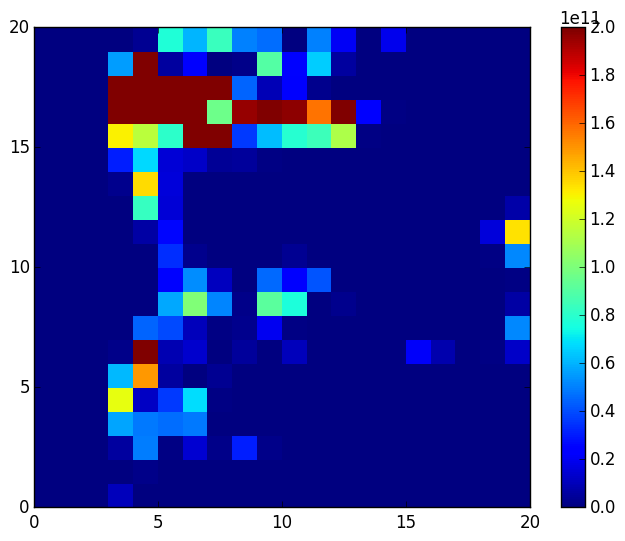

PyObject <matplotlib.colorbar.Colorbar object at 0x7facf305a048>

In [68]:
sol = minimize(me,me_alpha);
pcolor(reshape(max(sol.x,0.0),20,20),vmax=2e11)
colorbar()